In the original model, the sentence representations are concatenated as

$$
\text{features} = \text{concat}(u, v, u \odot v, |u - v|)
$$

where $u$ and $v$ are the sentence representations, $\odot$ is the element-wise product, and $|$ is the absolute value. These features are then passed through the MLP. The multiplication and substraction operations are used to capture the built inductive biases of the model. The multiplication operation captures the similarity between the two sentences, while the substraction operation captures the difference between the two sentences.

We are going to highlight two 

1. Positional embedding
2. More flexible inductive bias

However, this inductive bias is not structured, as all the elements are concatenated together and presented to the MLP. It could be that 

In [1]:
# Import the PlotResults class than reads all the results saved in `/store` and plots them
import sys
sys.path.insert(0, 'nli/')

In [2]:
from setup import find_checkpoint
import os
import json
import pandas as pd
import tensorboard as tb


In [3]:


df

,dev,dev (mult),test,test (mult)
AvgWordEmb,65.6,65.9,65.5,66.2
UniLSTM,81.2,81.1,80.9,80.3
BiLSTM-last,80.3,80.5,80.3,80.4
BiLSTM-Max,83.9,84.3,84.0,83.7


In [4]:
import numpy as np

from tensorboard.backend.event_processing import event_file_loader
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

from tqdm import tqdm
import matplotlib.pyplot as plt

In [5]:
mults_dict = {}

for model in models_i:
        model_feature = model + features_types['multiplication']
        _, version_path = find_checkpoint(model_feature, version)

        # event_acc = EventAccumulator(version_path, size_guidance={"scalars": 0})
        # event_acc.Reload()

        # scalar_tags = event_acc.Tags()["scalars"]

        # mults = []
        # for i in tqdm(range(4)):
        #     scalar_events = event_acc.Scalars(f'multiplier_{i}')
        #     mult = [s.value for s in scalar_events]
        #     mults.append(mult)
        # mults = np.array(mults)

        # # save mults at version_path
        # np.save(os.path.join(version_path, 'store/mults.npy'), mults)

        # load mults at version_path
        mults = np.load(os.path.join(version_path, 'store/mults.npy'))
        
        mults_dict[model_feature] = mults

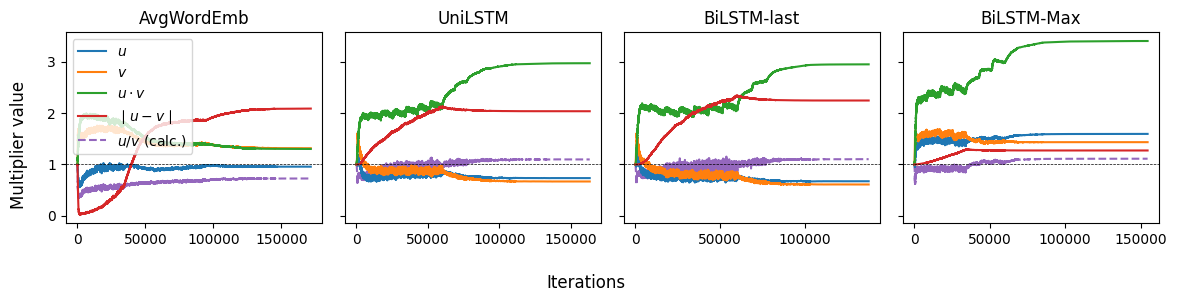

: 

In [32]:

mult_labels = ['$u$', '$v$', '$u \cdot v$', '$\mid u - v \mid$']

size = 3
n_models = len(mults_dict)
fig, axs = plt.subplots(1, n_models, figsize=(n_models*size, size), sharey=True)

for mult, model, ax in zip(mults_dict.values(), list(models.values()), axs):

    ax.set_title(model)

    for i, mult_label in enumerate(mult_labels):
        ax.plot(mult[i], label=mult_label)

    # plot a horizontal line at 1
    ax.plot(mult[0] / mult[1], label='$u/v$ (calc.)', linestyle='--', zorder  = 0)
    ax.axhline(1, color='black', linestyle='--', linewidth=0.5)

axs[0].legend(loc = 'upper left')

fig.supxlabel('Iterations')
fig.supylabel('Multiplier value')
fig.tight_layout()

plt.show()